In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('https://archive.ics.uci.edu/static/public/2/data.csv')
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


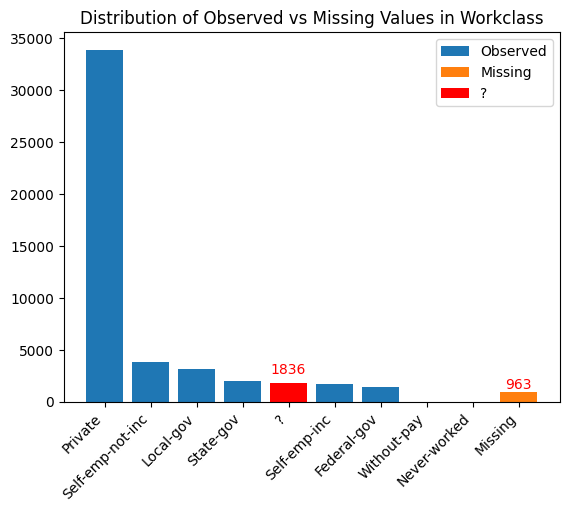

In [43]:
# Distribution of observed vs. missing values
observedw = df[df['workclass'].notna()]['workclass']
missingw = df[df['workclass'].isna()]['workclass']
question_markw = df[df['workclass'] == '?']['workclass']

# Count the occurrences of each unique value in 'observed'
observed_countsw = observedw.value_counts()

# Create a bar chart for observed values
plt.bar(observed_countsw.index, observed_countsw.values, label='Observed')

# Add a bar for missing values
plt.bar(['Missing'], missingw.size, label='Missing')

# Add the number of missing values as text on the bar (higher position)
plt.text('Missing', missingw.size * 1.7, missingw.size, ha='center', va='center', color='red')

# Add a separate bar for question marks with red color
plt.bar(['?'], question_markw.size, color='red', label='?')

# Add the number of question marks as text on the bar
plt.text('?', question_markw.size * 1.7, question_markw.size, ha='center', va='center', color='red')



plt.legend()
plt.title('Distribution of Observed vs Missing Values in Workclass')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


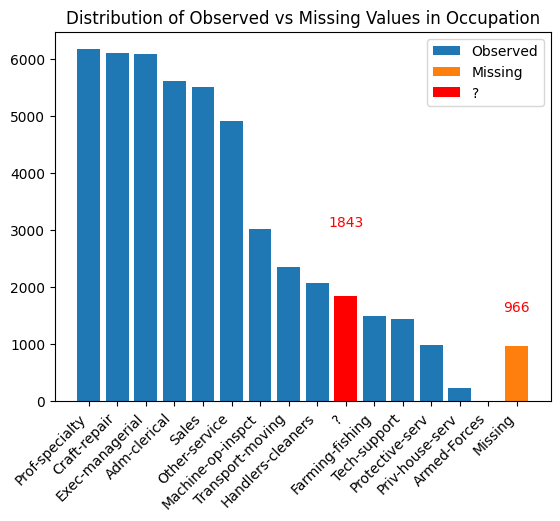

In [47]:
# Distribution of observed vs. missing values
observedo = df[df['occupation'].notna()]['occupation']
missingo = df[df['occupation'].isna()]['occupation']
question_marko = df[df['occupation'] == '?']['occupation']

# Count the occurrences of each unique value in 'observed'
observed_countso = observedo.value_counts()

# Create a bar chart for observed values
plt.bar(observed_countso.index, observed_countso.values, label='Observed')

# Add a bar for missing values
plt.bar(['Missing'], missingo.size, label='Missing')

# Add the number of missing values as text on the bar (higher position)
plt.text('Missing', missingo.size * 1.7, missingo.size, ha='center', va='center', color='red')

# Add a separate bar for question marks with red color
plt.bar(['?'], question_marko.size, color='red', label='?')

# Add the number of question marks as text on the bar
plt.text('?', question_marko.size * 1.7, question_marko.size, ha='center', va='center', color='red')



plt.legend()
plt.title('Distribution of Observed vs Missing Values in Occupation')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


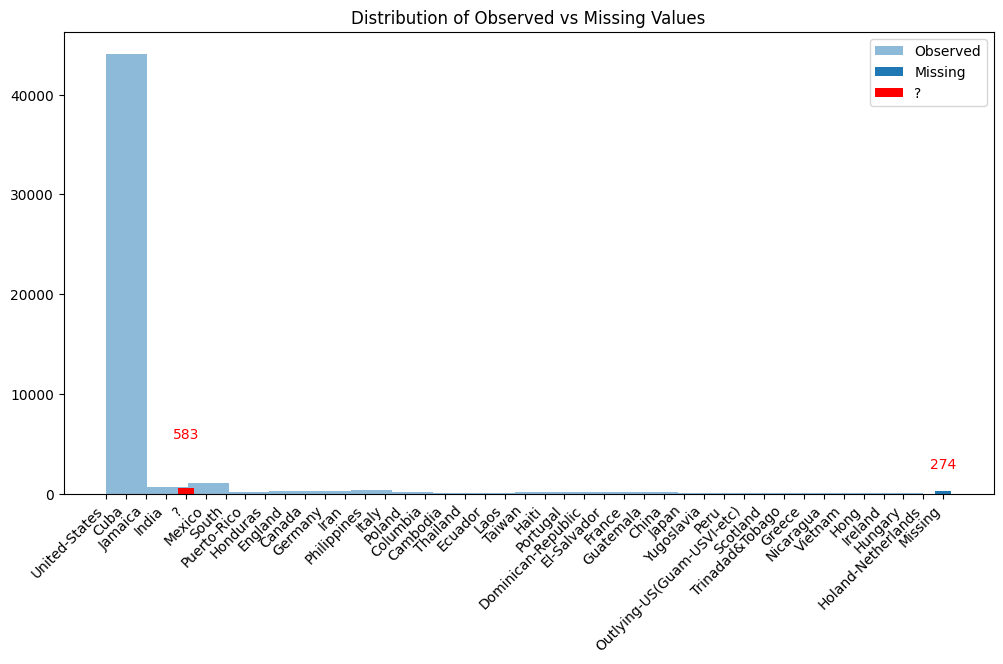

In [24]:
import matplotlib.pyplot as plt

# Distribution of observed vs. missing values
observed = df[df['native-country'].notna()]['native-country']
missing = df[df['native-country'].isna()]['native-country']
question_marks = df[df['native-country'] == '?']['native-country']

plt.figure(figsize=(12, 6))
plt.hist(observed, bins=20, alpha=0.5, label='Observed')
plt.bar(['Missing'], missing.size, label='Missing')

# Add the number of missing values as text on the bar (higher position)
plt.text('Missing', missing.size * 10.7, missing.size, ha='center', va='center', color='red')

# Add a separate bar for question marks with red color
plt.bar(['?'], question_marks.size, color='red', label='?')

# Add the number of question marks as text on the bar
plt.text('?', question_marks.size * 10.2, question_marks.size, ha='center', va='center', color='red')

plt.legend()
plt.title('Distribution of Observed vs Missing Values')
plt.xticks(rotation=45, ha='right')
plt.show()

In [57]:
# Create binary indicators for missing values
df['occupation_missing'] = df['occupation'].isna().astype(int)
df['workclass_missing'] = df['workclass'].isna().astype(int)

# Compute correlation between missingness indicators
correlation_matrix = df[['occupation_missing', 'workclass_missing']].corr()
correlation_matrix


,occupation_missing,workclass_missing
occupation_missing,1.000000,0.998415
workclass_missing,0.998415,1.000000


In [56]:
filtered_df_workclass = df[df['workclass'] == '?']
filtered_df_occupation = df[df['occupation'] == '?']

# Display the filtered rows
filtered_df_workclass.head(5)
filtered_df_occupation.head(5)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,occupation_missing,workclass_missing
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,0,0
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K,0,0
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,0,0
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K,0,0
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K,0,0


In [53]:
missing_occupation = df[df['occupation'] == '?']
zero_capital_gain = df[df['capital-gain'] == 0]

In [54]:
proportion_missing_zero_gain = len(missing_occupation[missing_occupation['capital-gain'] == 0]) / len(missing_occupation)
overall_proportion_zero_gain = len(zero_capital_gain) / len(df)

print(f"Proportion of missing occupation with zero capital gain: {proportion_missing_zero_gain}")
print(f"Overall proportion with zero capital gain: {overall_proportion_zero_gain}")

Proportion of missing occupation with zero capital gain: 0.9332609875203473
Overall proportion with zero capital gain: 0.9173866754023177


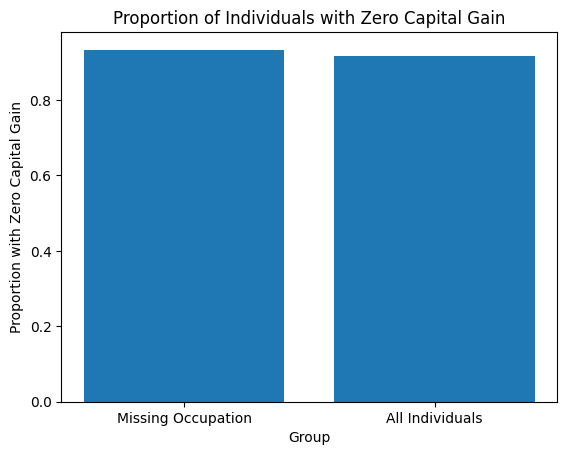

In [55]:
# Data for the bar chart
groups = ['Missing Occupation', 'All Individuals']
proportions = [0.933, 0.917]

# Create the bar chart
plt.bar(groups, proportions)

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Proportion with Zero Capital Gain')
plt.title('Proportion of Individuals with Zero Capital Gain')

# Display the chart
plt.show()

In [61]:

# Create binary indicators for missing values
df['occupation_missing'] = df['occupation'].isna().astype(int) # Changed df1 to df
df['capital-gain'] = df['capital-gain'].isna().astype(int) # Changed df1 to df

# Compute correlation between missingness indicators
correlation_matrix1 = df[['occupation_missing', 'capital-gain']].corr()
correlation_matrix1


,occupation_missing,capital-gain
occupation_missing,1.0,NaN
capital-gain,NaN,NaN
